In [1]:
import numpy as np

In [3]:
import pandas as pd

In [9]:
# Load CSV file into a Pandas DataFrame
df = pd.read_csv("creditcard.csv")

# Display the first 5 rows
print(df.head())

# Check dataset shape
print("Dataset Shape:", df.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [16]:
# Convert Pandas DataFrame to NumPy array
data = df.to_numpy()

# Print shape and first 5 rows of NumPy array
print("NumPy Array Shape:", data.shape)
print("First 5 rows:\n", data[:5])

NumPy Array Shape: (79318, 31)
First 5 rows:
 [[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02  2.53634674e+00
   1.37815522e+00 -3.38320770e-01  4.62387778e-01  2.39598554e-01
   9.86979013e-02  3.63786970e-01  9.07941720e-02 -5.51599533e-01
  -6.17800856e-01 -9.91389847e-01 -3.11169354e-01  1.46817697e+00
  -4.70400525e-01  2.07971242e-01  2.57905802e-02  4.03992960e-01
   2.51412098e-01 -1.83067779e-02  2.77837576e-01 -1.10473910e-01
   6.69280749e-02  1.28539358e-01 -1.89114844e-01  1.33558377e-01
  -2.10530535e-02  1.49620000e+02  0.00000000e+00]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01  1.66480113e-01
   4.48154078e-01  6.00176493e-02 -8.23608088e-02 -7.88029833e-02
   8.51016549e-02 -2.55425128e-01 -1.66974414e-01  1.61272666e+00
   1.06523531e+00  4.89095016e-01 -1.43772296e-01  6.35558093e-01
   4.63917041e-01 -1.14804663e-01 -1.83361270e-01 -1.45783041e-01
  -6.90831352e-02 -2.25775248e-01 -6.38671953e-01  1.01288021e-01
  -3.39846476e-01  1.67170404e-01  1.25894532

In [13]:
columns = df.columns
print("Column Names:", columns)

Column Names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


 Handling Missing Values in the Dataset
Before proceeding with analysis, let's check for missing values and handle them using NumPy.

In [18]:
# Check if any missing values exist
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


Handle Missing Values with NumPy
If there are missing values, we can fill them with mean, median, or zero:

In [21]:
# Convert dataframe to numpy array
data = df.to_numpy()

# Replace NaN values with column mean
col_means = np.nanmean(data, axis=0)
data_no_missing = np.where(np.isnan(data), col_means, data)

# Verify if missing values are handled
print("Any missing values left?", np.isnan(data_no_missing).sum() == 0)

Any missing values left? True


Normalize Data
Some columns may have large values (like transaction amounts). Normalizing helps scale the data properly.

In [ ]:
# Normalize numerical features (excluding labels)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[:, :-1])  # Exclude the last column if it's the label

print("First 5 rows of normalized data:\n", normalized_data[:5])

Analyze the Dataset with NumPy

1️⃣ Find Total Transactions & Fraud Cases

In [28]:
total_transactions = data.shape[0]
fraud_cases = np.sum(data[:, -1] == 1)  # Assuming last column is the fraud label

print(f"Total Transactions: {total_transactions}")
print(f"Total Fraud Cases: {fraud_cases}")

Total Transactions: 79318
Total Fraud Cases: 191


2️⃣ Average Transaction Amount

In [31]:
avg_amount = np.mean(data[:, 1])  # Assuming 'Amount' is in column 1
print("Average Transaction Amount:", avg_amount)

Average Transaction Amount: -0.25742560372689743


3️⃣ Maximum Transaction Amount

In [35]:
max_amount = np.max(data[:, 1])
print("Highest Transaction Amount:", max_amount)

Highest Transaction Amount: 1.96049656699577


4️⃣ Find the Customer with the Highest Transaction

In [47]:
max_index = np.argmax(data[:, 1])  # Get index of max transaction
highest_trans = data[max_index]
print("Customer with Highest Transaction:\n", highest_trans)

Customer with Highest Transaction:
 [ 1.13910000e+04  1.96049657e+00  9.66209291e-01 -4.22803970e+00
  1.50400606e+00  2.37497520e+00  2.62568177e+00 -1.07609684e+00
  1.08422839e+00  1.23721109e+00 -9.11518938e-01  1.76903369e+00
 -2.96123861e+00  1.81621473e+00 -1.29841393e+00  1.44400446e+00
  9.66276312e-01  3.26743907e+00  2.23395891e+00  1.20986203e+00
  2.18576883e-02 -1.79448035e-01 -2.86200288e-01  6.77954805e-01
  6.76118228e-01 -1.87571898e+00  3.02977844e-01 -1.68063287e-01
 -2.44677018e-01  1.00000000e+00  0.00000000e+00]


5️⃣ Find Average Amount of Fraudulent Transactions

In [41]:
fraud_avg_amount = np.mean(data[data[:, -1] == 1][:, 1])  # Fraud cases only

print("Average Amount in Fraud Cases:", fraud_avg_amount)

Average Amount in Fraud Cases: -6.660360931954441


6️⃣ Find Number of Fraud Cases Above a Certain Amount

In [44]:
high_value_fraud = np.sum((data[:, 1] > 0.5) & (data[:, -1] == 1))  # Amount normalized, 0.5 is threshold

print("Fraud Cases with High Amount:", high_value_fraud)

Fraud Cases with High Amount: 21


7️⃣ Standard Deviation of Transaction Amounts

In [49]:
std_amount = np.std(data[:, 1])  
print("Standard Deviation of Transaction Amounts:", std_amount)

Standard Deviation of Transaction Amounts: 1.8901674038221046


8️⃣ Calculate Fraud Percentage

In [57]:
fraud_percentage = (fraud_cases / total_transactions) * 100  
print("Percentage of Fraud Cases:", fraud_percentage)

Percentage of Fraud Cases: 0.24080284424720746


 Identify Suspicious Transactions

In [59]:
# Define threshold (e.g., top 1% transactions)
threshold = np.percentile(data[:, 1], 99)

# Find suspicious transactions
suspicious_transactions = data[data[:, 1] > threshold]

print("Number of Suspicious Transactions:", suspicious_transactions.shape[0])

Number of Suspicious Transactions: 794


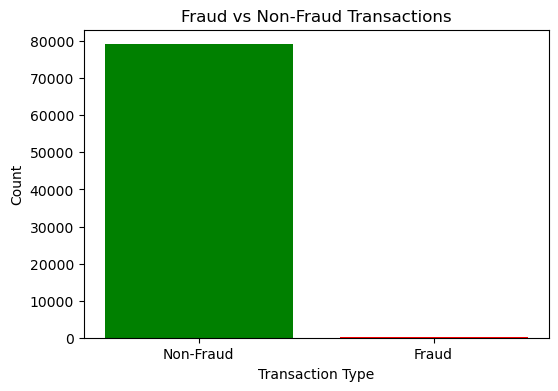

In [64]:
import matplotlib.pyplot as plt  

# Count fraud and non-fraud cases
fraud_cases = np.sum(data[:, -1] == 1)
non_fraud_cases = np.sum(data[:, -1] == 0)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(["Non-Fraud", "Fraud"], [non_fraud_cases, fraud_cases], color=["green", "red"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

2️⃣ Distribution of Transaction Amounts

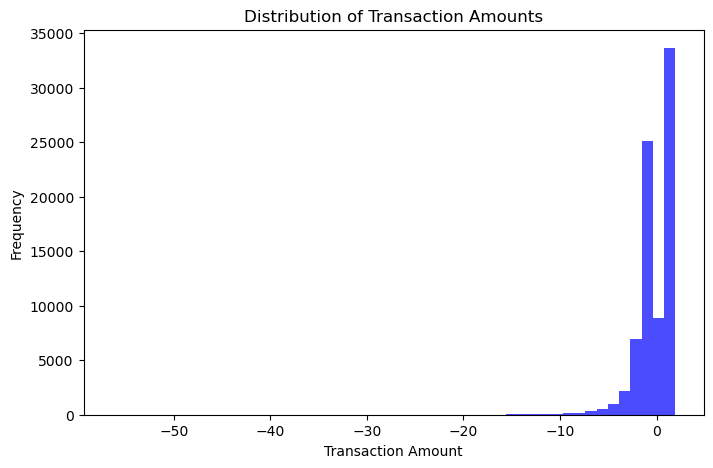

In [66]:
plt.figure(figsize=(8, 5))
plt.hist(data[:, 1], bins=50, color="blue", alpha=0.7)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show()

3️⃣ Fraudulent Transactions Distribution

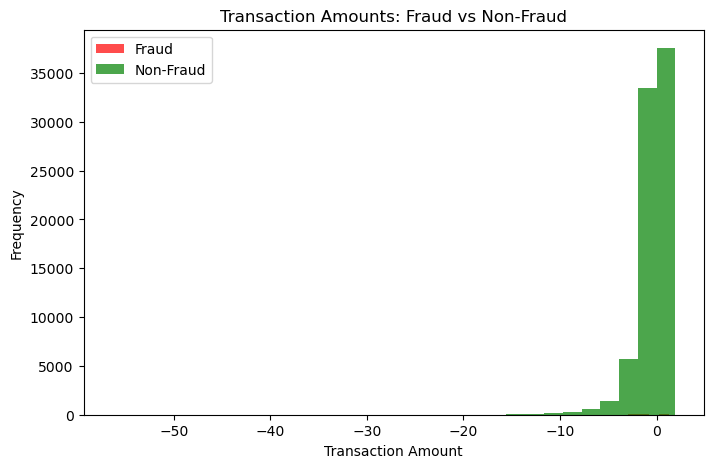

In [69]:
plt.figure(figsize=(8, 5))
plt.hist(data[data[:, -1] == 1][:, 1], bins=30, color="red", alpha=0.7, label="Fraud")
plt.hist(data[data[:, -1] == 0][:, 1], bins=30, color="green", alpha=0.7, label="Non-Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.legend()
plt.show()